# `pd.read_sql_query`

Confirming that we're using the right environment:

In [1]:
import os
import pymysql
import pandas as pd
print(os.environ['CONDA_DEFAULT_ENV'])

pedagogy


In [2]:
host = os.getenv('MYSQL_HOST')
user = os.getenv('MYSQL_USER')
password = os.getenv('MYSQL_PASSWORD')
database = os.getenv('MYSQL_DATABASE')

conn = pymysql.connect(
    host=host,
    port=int(3306),
    user=user,
    passwd=password,
    db=database)

df = pd.read_sql_query("SELECT * FROM workshop", conn, index_col='id')
# convert datetime to '2018-09' month and year format
df['mnth_yr'] = df.workshop_start.dt.to_period('M')
df.tail(5)

,workshop_name,workshop_category,workshop_instructor,workshop_start,workshop_hours,workshop_venue,class_size,mnth_yr
id,,,,,,,,
34,BPR 2018,Corporate,9,2018-05-17 18:00:00,18,"BPR, Bandung",10,2018-05
35,PT Sun Life 2018,Academy,1,2018-05-02 18:00:00,16,"Menara Sun Life, Mega Kuningan",12,2018-05
36,Deragon P4DS,Academy,1,2018-07-30 18:00:00,9,Block 71,23,2018-07
37,Chronos PS,Academy,5,2018-06-28 18:00:00,9,Block 71,18,2018-06
38,Chronos PS,Academy,16,2018-06-28 18:00:00,9,Connext,13,2018-06


## Data Visualization

In [38]:
df['this_user'] = df['workshop_instructor'] == 1
dat = df.loc[:,['this_user', 'class_size']]
dat.head()

,this_user,class_size
id,,
1,True,21
2,True,30
3,True,12
4,True,29
5,True,5


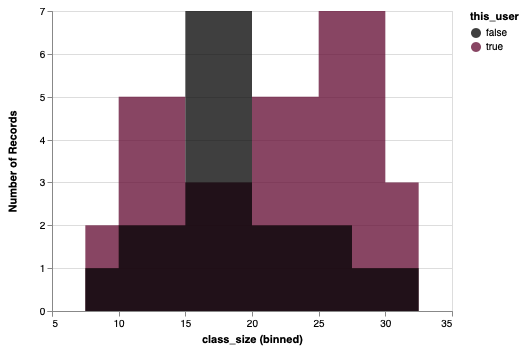

In [39]:
import altair as alt

alt.Chart(dat).mark_area(
    opacity=0.75,
    interpolate='step'
).encode(
    alt.X("class_size:Q", bin=alt.Bin(maxbins=12)),
    alt.Y('count()', stack=None),
    alt.Color(
        'this_user',
        scale=alt.Scale(range=['#000000', '#62092f'])
    )
)

In [65]:
dat = df.loc[df.this_user==True, ['workshop_hours', 'mnth_yr', 'workshop_category', 'class_size']]
# mnth_yr needs to be a string instead of Period
dat['mnth_yr'] = df['mnth_yr'].astype(str)
dat.head()

,workshop_hours,mnth_yr,workshop_category,class_size
id,,,,
1,9,2017-08,DSS,21
2,9,2017-09,DSS,30
3,9,2017-10,DSS,12
4,9,2017-10,DSS,29
5,18,2017-10,Corporate,5


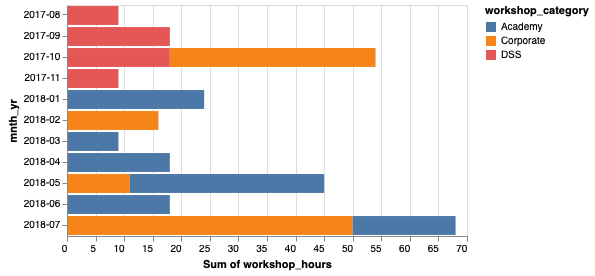

In [66]:
alt.Chart(dat).mark_bar().encode(
    alt.X("sum(workshop_hours)"),
    alt.Y('mnth_yr'),
    alt.Color('workshop_category')
)

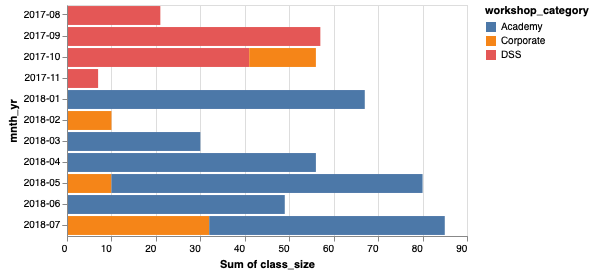

In [67]:
alt.Chart(dat).mark_bar().encode(
    alt.X("sum(class_size)"),
    alt.Y('mnth_yr'),
    alt.Color('workshop_category')
)

In [69]:
# transform to [mnth_yr, 'workshop_category', 'variable', 'value']
# perform a Trellis Stacked Bar Chart later
melted = pd.melt(dat, 
              id_vars=['mnth_yr', 'workshop_category'], 
              value_vars=['workshop_hours', 'class_size'])
melted.head()

,mnth_yr,workshop_category,variable,value
0,2017-08,DSS,workshop_hours,9
1,2017-09,DSS,workshop_hours,9
2,2017-10,DSS,workshop_hours,9
3,2017-10,DSS,workshop_hours,9
4,2017-10,Corporate,workshop_hours,18


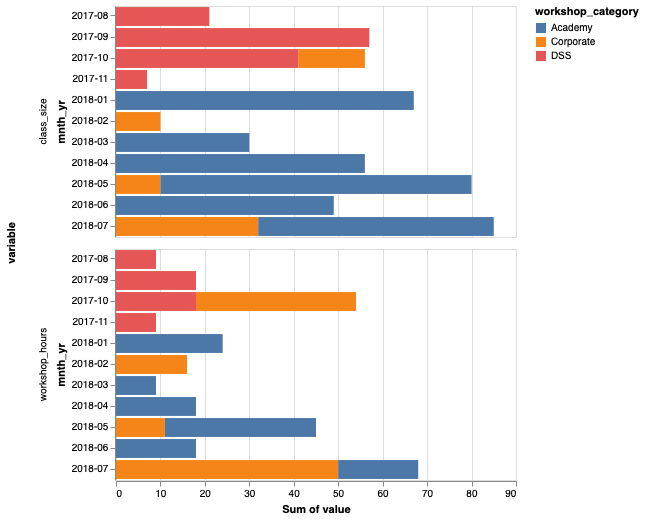

In [73]:
alt.Chart(melted).mark_bar().encode(
    row='variable',
    x=alt.X("sum(value)"),
    y=alt.Y('mnth_yr'),
    color=alt.Color('workshop_category')
)